### Model for classifier price on phone

In [2]:
import pandas as pd
import numpy  as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [4]:
df_train.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_train.describe()[1:]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
print('Размер датафрейма:',df_train.shape)

Размер датафрейма: (2000, 21)


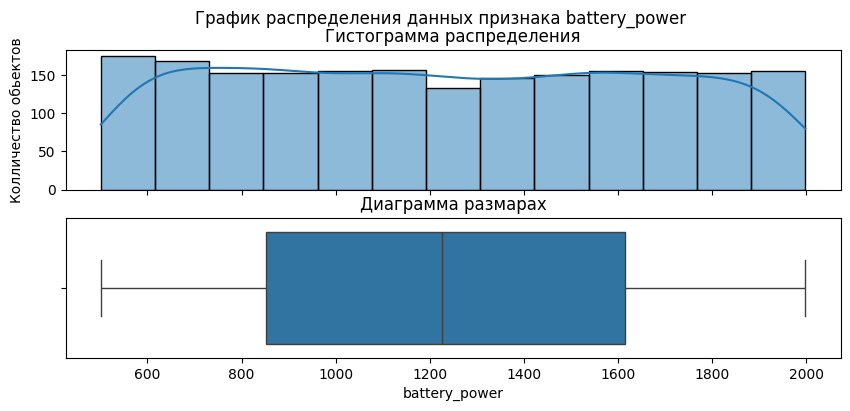

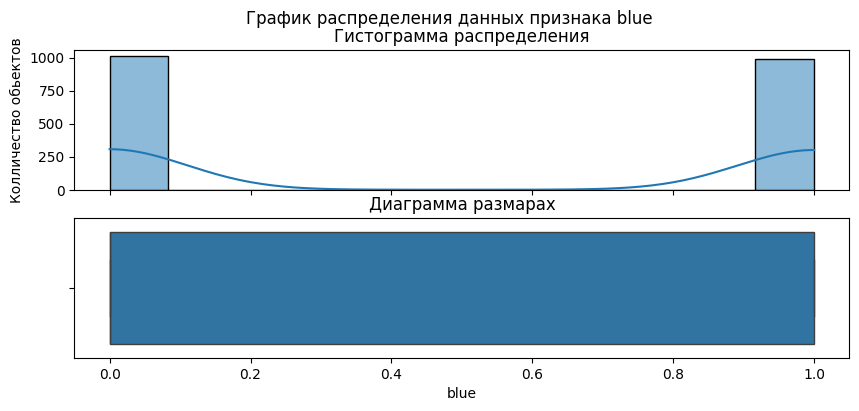

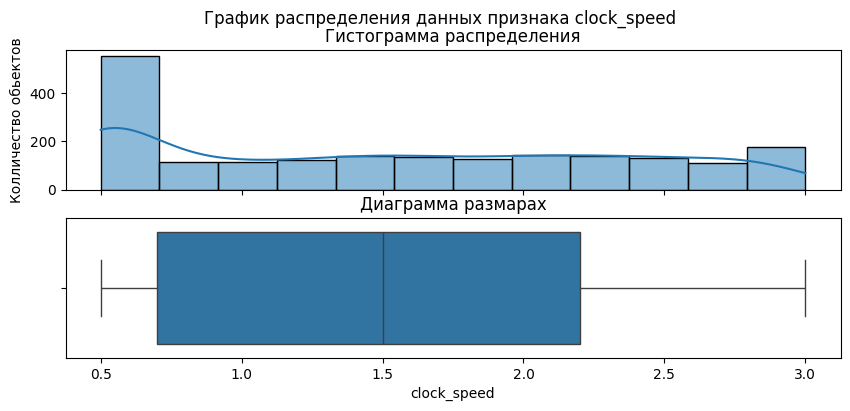

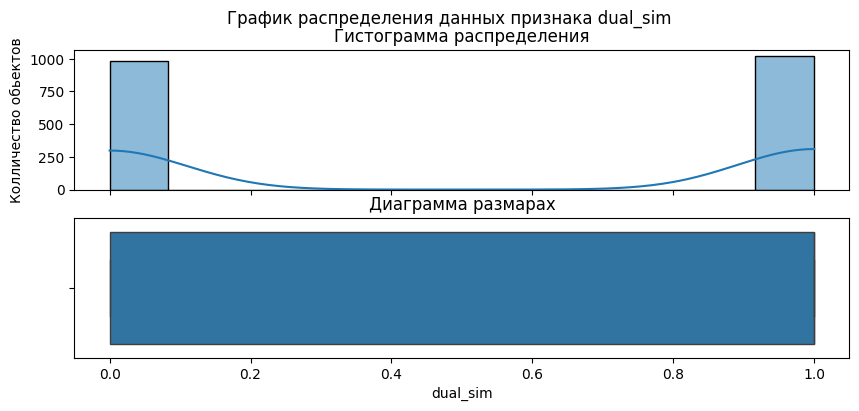

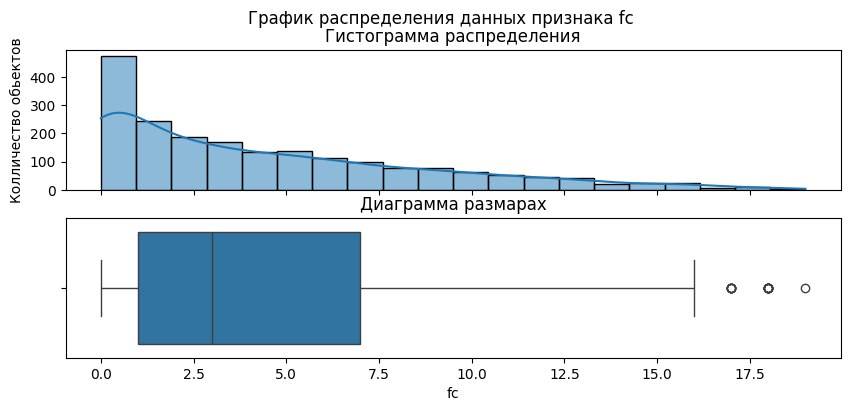

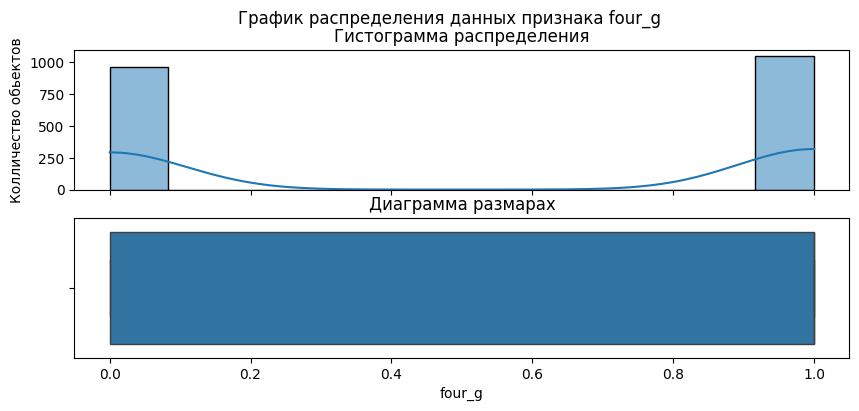

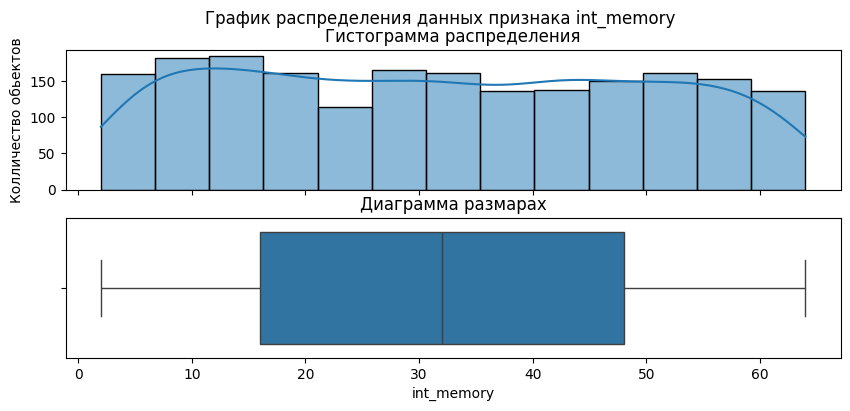

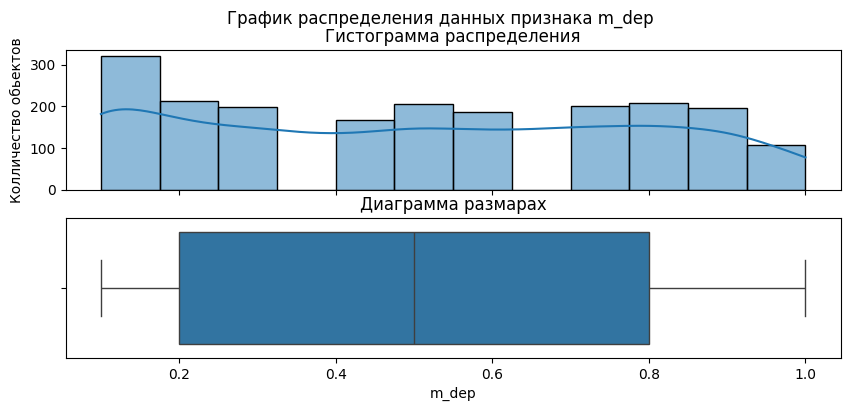

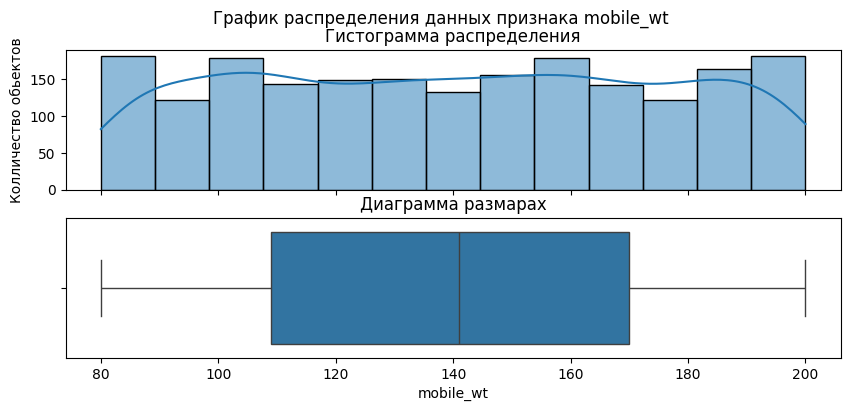

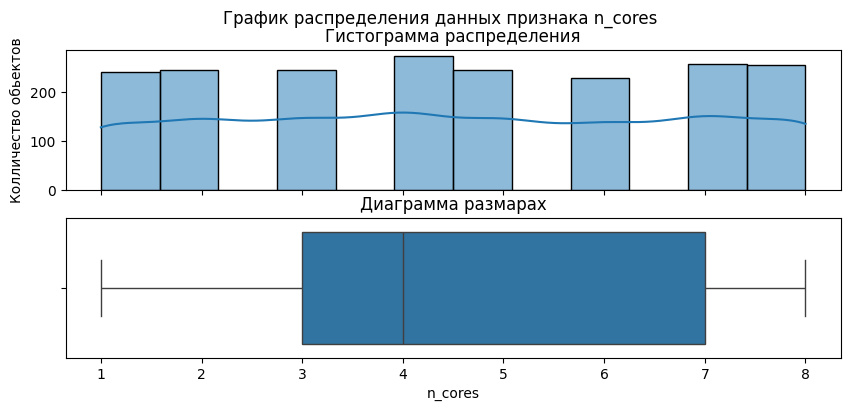

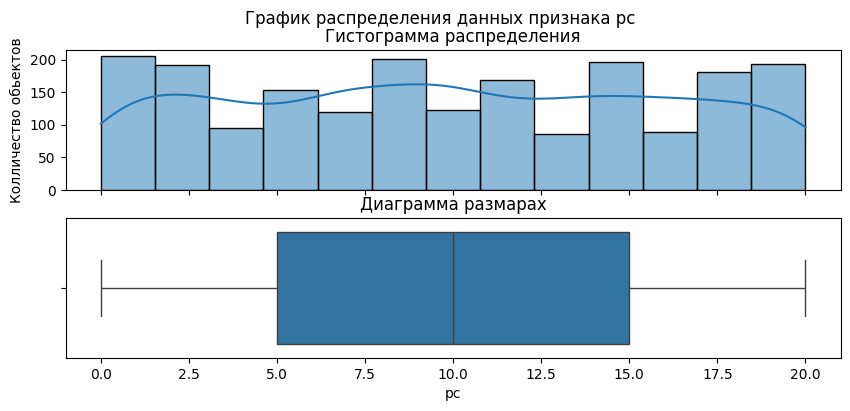

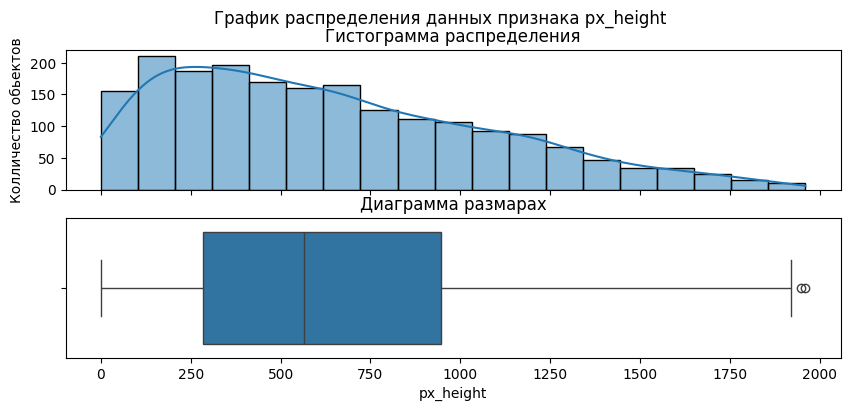

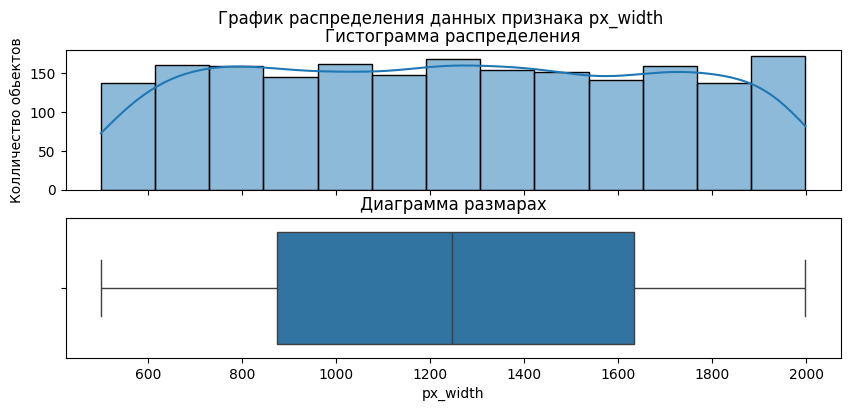

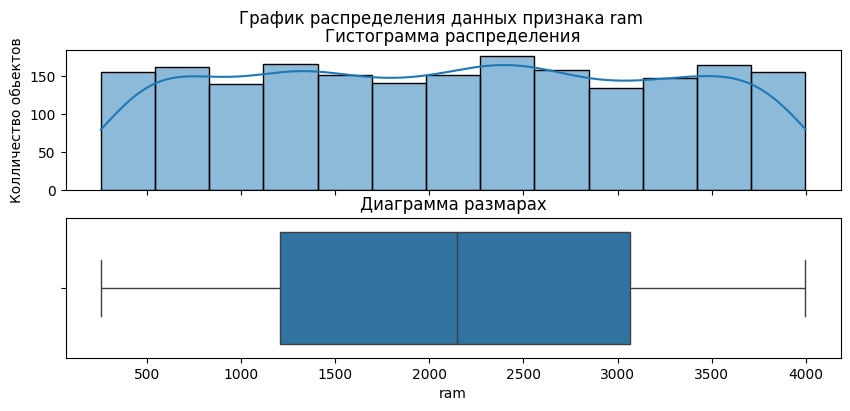

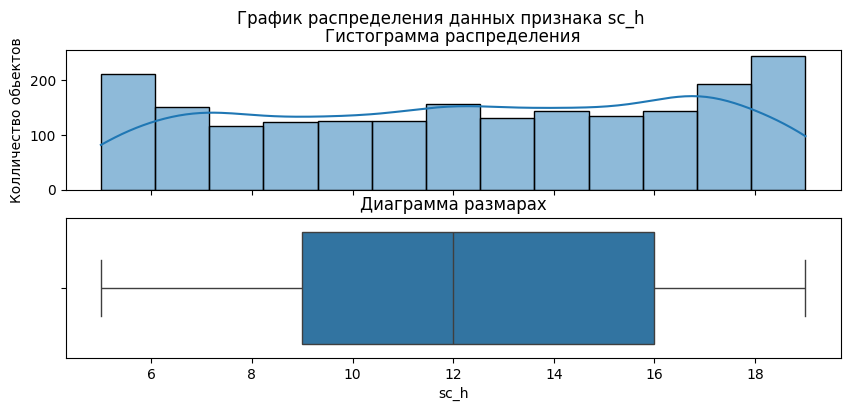

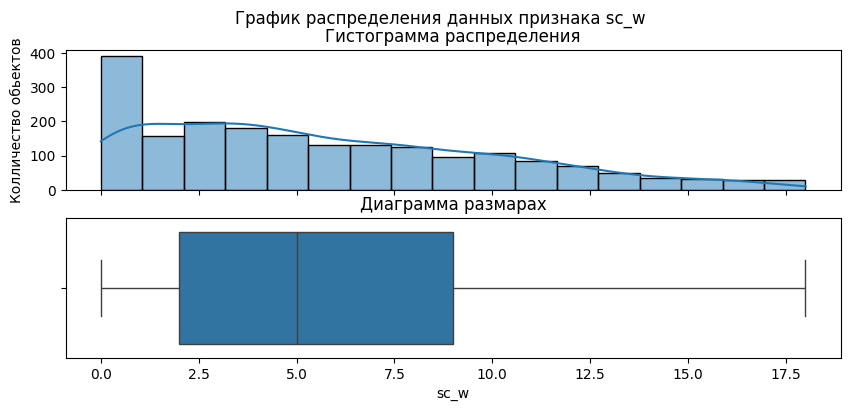

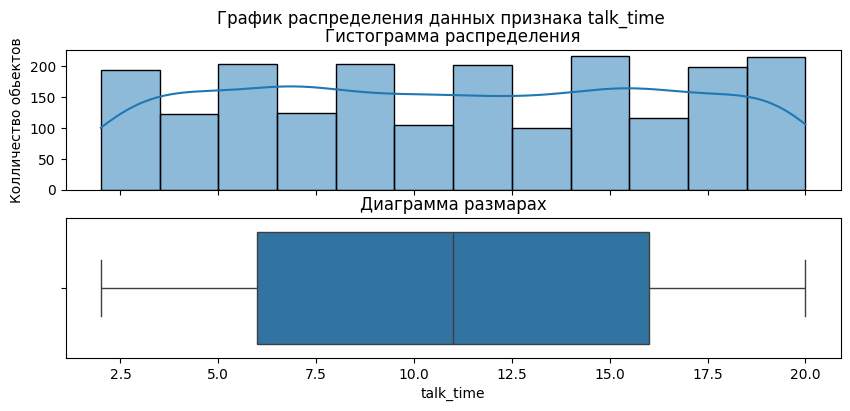

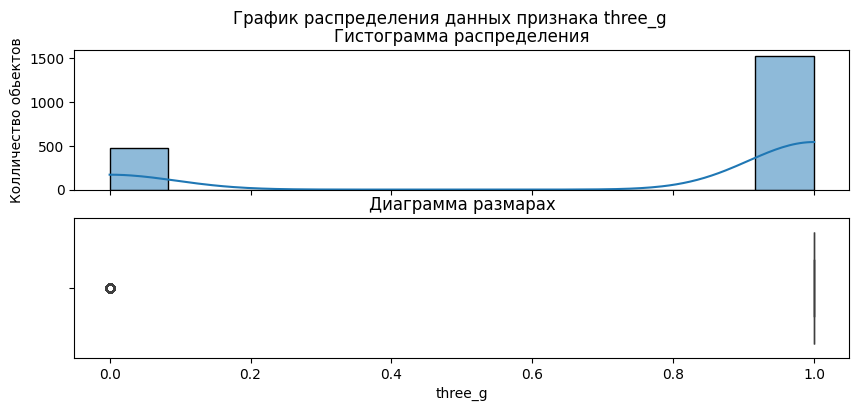

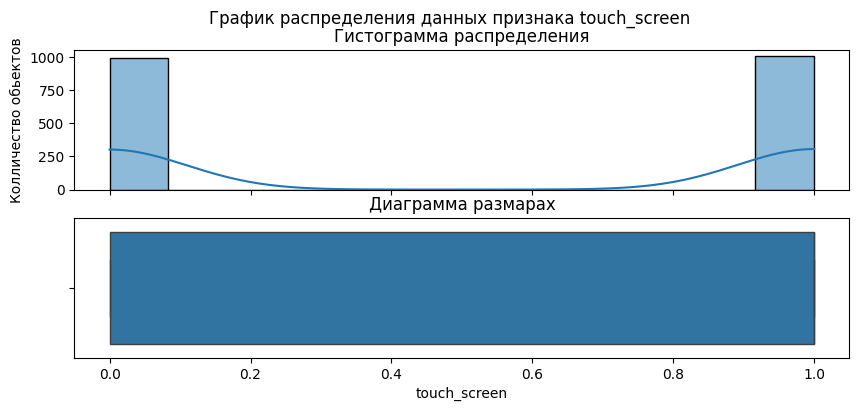

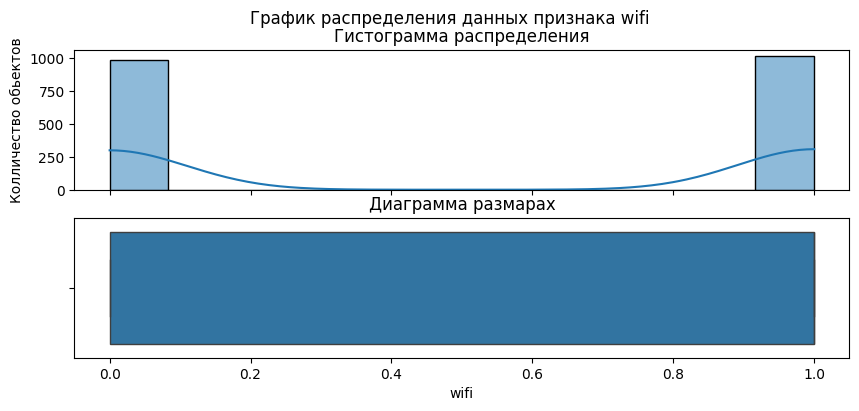

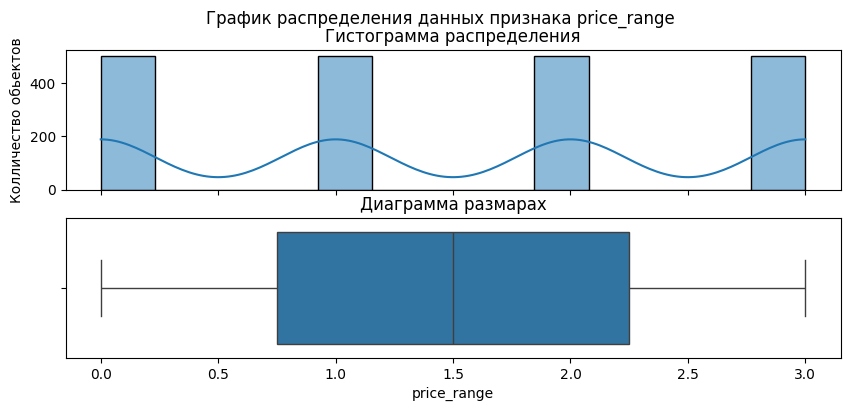

In [8]:
for col in df_train.columns:
    fig,axs=plt.subplots(nrows=2,sharex=True,figsize=(10,4))
    sns.histplot(x=df_train[col],kde=True,ax=axs[0])
    axs[0].set_title('Гистограмма распределения')
    axs[0].set_ylabel('Колличество обьектов')

    sns.boxplot(df_train[col],orient='h',ax=axs[1])
    axs[1].set_title('Диаграмма размарах')
    plt.suptitle(f'График распределения данных признака {col}')
    plt.show()

<Axes: >

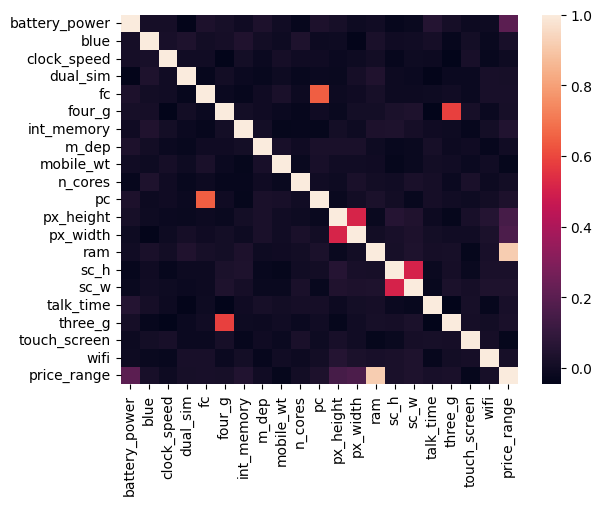

In [42]:
corr_matrix=df_train.corr()
sns.heatmap(corr_matrix)

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

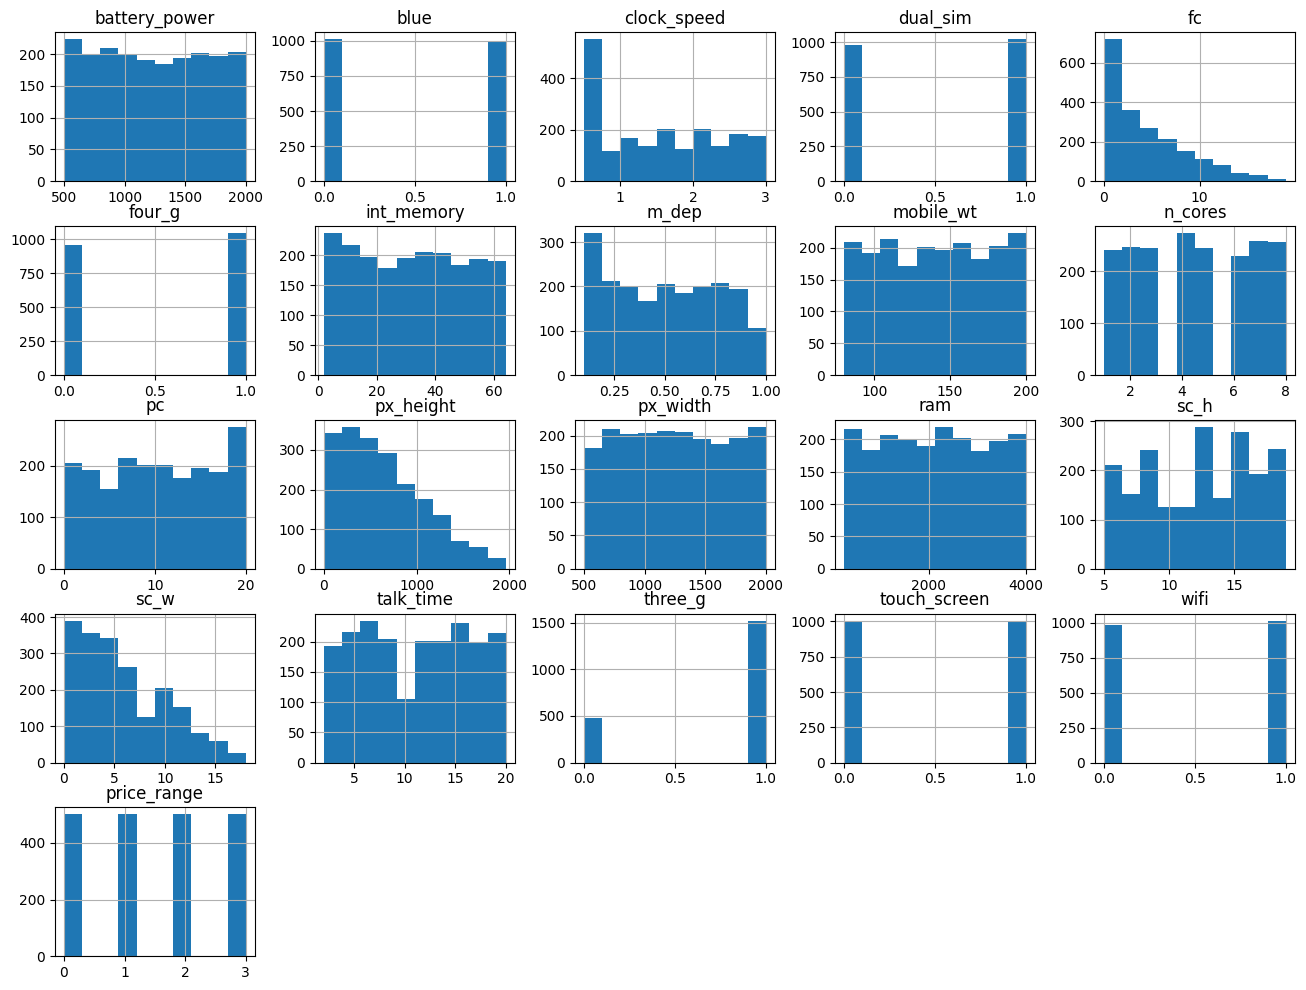

In [52]:
# for col in df_train.columns:
#     sns.histplot(df_train[col],kde=True)
#     plt.show()
df_train.hist(figsize=(16, 12),)

In [ ]:
X_train=df_train.drop(columns=['price_range'])
y_train=df_train['price_range']

In [33]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_norm=scaler.transform(X_train)

In [54]:
param={
    'n_estimators': np.arange(100,1000,100),
    'max_depth': np.arange(5,20,5)
}
model_var=GridSearchCV(RandomForestRegressor(max_features=X_train.shape[1]//3),param_grid=param,cv=5,n_jobs=-1)
model_var.fit(X_train_norm,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_features=6), n_jobs=-1,
             param_grid={'max_depth': array([ 5, 10, 15]),
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [57]:
features_important=pd.Series(model_var.best_estimator_.feature_importances_,index=X_train.columns)
features_important.sort_values(ascending=True)

four_g           0.001458
dual_sim         0.001542
blue             0.001568
wifi             0.001622
three_g          0.001652
touch_screen     0.001707
n_cores          0.006058
m_dep            0.006907
fc               0.006984
clock_speed      0.007540
sc_h             0.007692
pc               0.009028
talk_time        0.009060
sc_w             0.009090
int_memory       0.011662
mobile_wt        0.014246
px_height        0.032763
px_width         0.034258
battery_power    0.056196
ram              0.778967
dtype: float64

In [58]:
X_train.shape

(2000, 20)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
estimators=[
    GradientBoostingClassifier(random_state=0),
    SVC(probability=True,random_state=0),
    LogisticRegression(random_state=0,max_iter=10000)
]
estimator=RandomForestClassifier(random_state=0)
stacking_clf=StackingClassifier(estimators=estimators,final_estimator=estimator)
